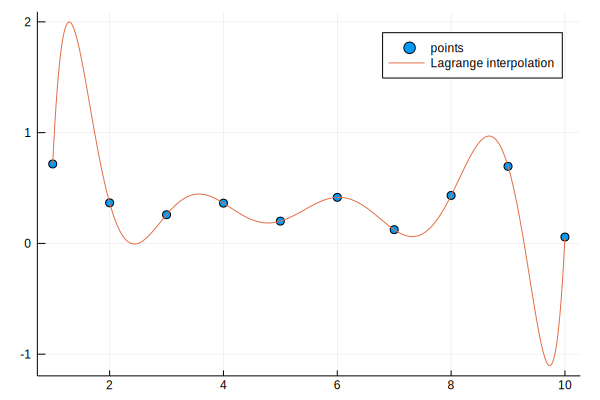

In [24]:
# zadanie nr 1 - interpolacja Lagrange'a

###############################################################

function lagrange_interpolation(x_s, y_s, x)
    val = 0
    for i in 1:1:length(x_s)
        tmp = y_s[i]
        for j in 1:1:length(x_s)
            if i != j
                tmp *= (x - x_s[j]) / (x_s[i] - x_s[j])
            end
        end
        val += tmp
    end
    return val
end

###############################################################

using Plots

x_s =  1:1:10
y_s = [rand() for x in x_s]

###############################################################

x_s2 = 1:0.02:10
y_s2 = [lagrange_interpolation(x_s, y_s, x) for x in x_s2]

###############################################################

scatter(x_s, y_s, label = "points")
plot!(x_s2, y_s2, label = "Lagrange interpolation")

###############################################################

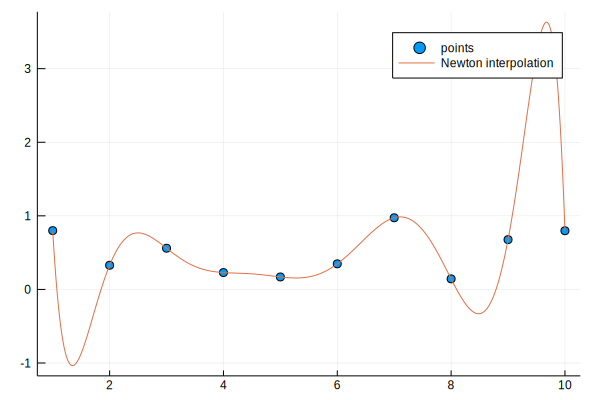

In [25]:
# zadanie nr 2 - interpolacja Netwona

###############################################################

using Plots, Pkg, Polynomials

###############################################################

function initialize_newton(xs, ys)
    n = length(xs)
    array = zeros(n,n)
    for i in 1:1:n
        array[i,1] = ys[i] 
    end
    for j in 2:1:n
        for i in j:1:n
            array[i,j] = (array[i,j-1] - array[i-1,j-1]) / (xs[i] - xs[i-j+1])
        end
    end

    a = zeros(n)
    for i in 1:1:n
        a[i] = array[i,i]
    end
    return a
end

###############################################################

function newton_interpolation(A, xs, x)
    val = A[1]
    for i in 2:1:length(A)
        tmp = A[i]
        for j in 1:1:i-1
            tmp *= (x-xs[j])
        end
        val += tmp
    end
    return val
end

###############################################################

x_s =  1:1:10
y_s = [rand() for x in x_s]

###############################################################

A = initialize_newton(x_s, y_s)
x_s3 = 1:0.02:10
y_s3 = [newton_interpolation(A, x_s, x) for x in x_s3]

###############################################################

scatter(x_s, y_s, label = "points")
plot!(x_s3, y_s3, label = "Newton interpolation")

###############################################################

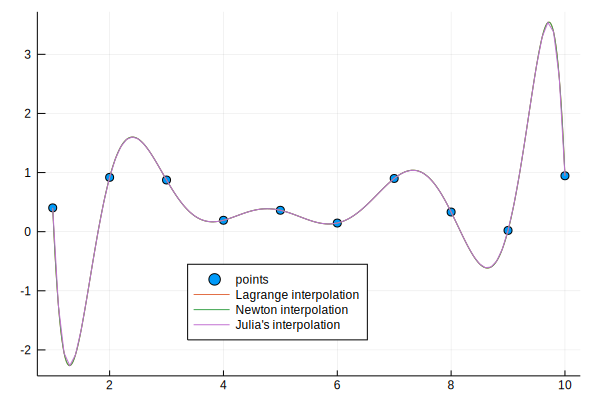

In [26]:
# zadanie nr 3 - porównanie poszczególnych interpolacji


using Plots, Pkg, Polynomials

###############################################################

function lagrange_interpolation(x_s, y_s, x)
    val = 0
    for i in 1:1:length(x_s)
        tmp = y_s[i]
        for j in 1:1:length(x_s)
            if i != j
                tmp *= (x - x_s[j]) / (x_s[i] - x_s[j])
            end
        end
        val += tmp
    end
    return val
end

###############################################################

function initialize_newton(xs, ys)
    n = length(xs)
    array = zeros(n,n)
    for i in 1:1:n
        array[i,1] = ys[i] 
    end
    for j in 2:1:n
        for i in j:1:n
            array[i,j] = (array[i,j-1] - array[i-1,j-1]) / (xs[i] - xs[i-j+1])
        end
    end

    a = zeros(n)
    for i in 1:1:n
        a[i] = array[i,i]
    end
    return a
end

###############################################################

function newton_interpolation(A, xs, x)
    val = A[1]
    for i in 2:1:length(A)
        tmp = A[i]
        for j in 1:1:i-1
            tmp *= (x-xs[j])
        end
        val += tmp
    end
    return val
end

###############################################################

x_s =  1:1:10
y_s = [rand() for x in x_s]

###############################################################

# LAGRANGE

x_s2 = 1:0.02:10
y_s2 = [lagrange_interpolation(x_s, y_s, x) for x in x_s2]

###############################################################

# NEWTON

A = initialize_newton(x_s, y_s)
x_s3 = 1:0.02:10
y_s3 = [newton_interpolation(A, x_s, x) for x in x_s3]

###############################################################

# JULIA

x_s4 = 1:0.1:10
fit = polyfit(x_s, y_s, length(x_s) - 1)


###############################################################

scatter(x_s, y_s, label = "points", legend=:bottom)

plot!(x_s2, y_s2, label = "Lagrange interpolation")

plot!(x_s3, y_s3, label = "Newton interpolation")

plot!(x_s4, polyval(fit, x_s4), label = "Julia's interpolation")

# all plots look the same - it means that I did everything correctly

###############################################################

,nodes,avg_lagrange,std_lagrange,avg_newton,std_newton,avg_julia,std_julia
,Any,Float64,Float64,Float64,Float64,Float64,Float64
1,10,0.0125859,0.0397745,0.0121303,0.038352,0.000649962,0.00204492
2,11,1.411e-5,4.93118e-6,3.0e-6,5.96285e-7,9.45e-6,1.491e-5
3,12,1.939e-5,7.07648e-6,4.9001e-6,8.17775e-7,5.93e-6,5.80556e-6
4,13,2.823e-5,1.00743e-5,8.6301e-6,9.33461e-7,7.23e-6,5.9251e-6
5,14,3.70401e-5,7.58521e-6,1.35701e-5,4.38604e-6,7.64e-6,3.17917e-6
6,15,5.10902e-5,1.39313e-5,1.549e-5,7.12507e-7,8.8e-6,3.83348e-6
7,16,6.03401e-5,1.30913e-5,1.93201e-5,4.31684e-7,9.4701e-6,4.64015e-6
8,17,7.19202e-5,2.03291e-5,2.36401e-5,9.00933e-7,8.4e-6,8.65384e-7
9,18,9.25402e-5,2.17137e-5,2.955e-5,8.70823e-7,9.45e-6,1.12768e-6


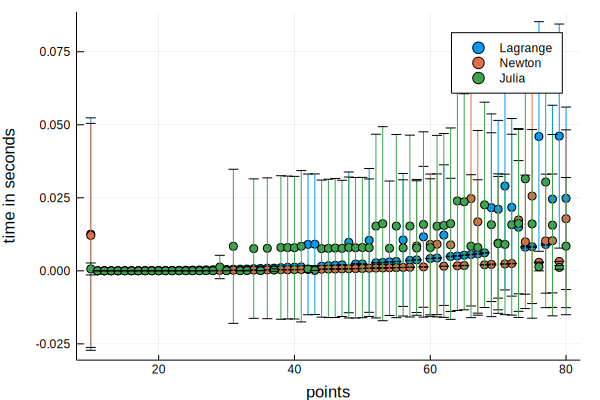

In [27]:
# zadanie nr 4 - porównanie czasow poszczególnych interpolacji

using DataFrames, Plots, Statistics, Pkg, Polynomials

###############################################################

function lagrange_interpolation(x_s, y_s, x)
    val = 0
    for i in 1:1:length(x_s)
        tmp = y_s[i]
        for j in 1:1:length(x_s)
            if i != j
                tmp *= (x - x_s[j]) / (x_s[i] - x_s[j])
            end
        end
        val += tmp
    end
    return val
end

###############################################################

function initialize_newton(xs, ys)
    n = length(xs)
    array = zeros(n,n)
    for i in 1:1:n
        array[i,1] = ys[i] 
    end
    for j in 2:1:n
        for i in j:1:n
            array[i,j] = (array[i,j-1] - array[i-1,j-1]) / (xs[i] - xs[i-j+1])
        end
    end

    a = zeros(n)
    for i in 1:1:n
        a[i] = array[i,i]
    end
    return a
end

###############################################################

function newton_interpolation(A, xs, x)
    val = A[1]
    for i in 2:1:length(A)
        tmp = A[i]
        for j in 1:1:i-1
            tmp *= (x-xs[j])
        end
        val += tmp
    end
    return val
end

###############################################################

function do_newton_interpolation(xs, ys, xs2) # wrapper
    A = initialize_newton(xs, ys)
    ys2 = [newton_interpolation(A, xs, x) for x in xs2]
    return ys2
end

function do_julia_interpolation(xs, ys, xs2) # wrapper
    fit = polyfit(xs, ys, length(xs) - 1)
    ys2 = polyval(fit, xs2)
    return ys2
end

###############################################################

range = 10:80

nodes = []
lagrange = []
newton = []
julia = []


for i in range
    xs = 10:1:i
    ys = [rand() for x in xs]
    
    for j in 1:10
        push!(nodes, i)
        
        xs2 = 1:0.1:i
        
        # LAGRANGE TIME
        
        push!(lagrange, @elapsed [lagrange_interpolation(xs, ys, x) for x in xs2])
        
        # NEWTON TIME
        
        push!(newton, @elapsed do_newton_interpolation(xs, ys, xs2))
        
        # JULIA TIME
        
        push!(julia, @elapsed do_julia_interpolation(xs, ys, xs2))
    end
end

###############################################################

df = DataFrame()

df[:nodes] = nodes
df[:lagrange] = lagrange
df[:newton] = newton
df[:julia] = julia

df2 = by(
    df, 
    :nodes, 
    df -> DataFrame(
        avg_lagrange = mean(df[:lagrange]),
        std_lagrange = std(df[:lagrange]),
        
        avg_newton = mean(df[:newton]),
        std_newton = std(df[:newton]),
        
        avg_julia = mean(df[:julia]),
        std_julia = std(df[:julia])
    )
)


display(df2)

###############################################################

# BAD PLOT QUALITY DUE TO JULIABOX ......

__plot__ = scatter(
    df2[:nodes],
    [df2[:avg_lagrange] df2[:avg_newton] df2[:avg_julia]],
    yerr = [df2[:std_lagrange] df2[:std_newton] df2[:std_julia]],
    labels = ["Lagrange" "Newton" "Julia"]
)

xlabel!("points")
ylabel!("time in seconds")

 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]


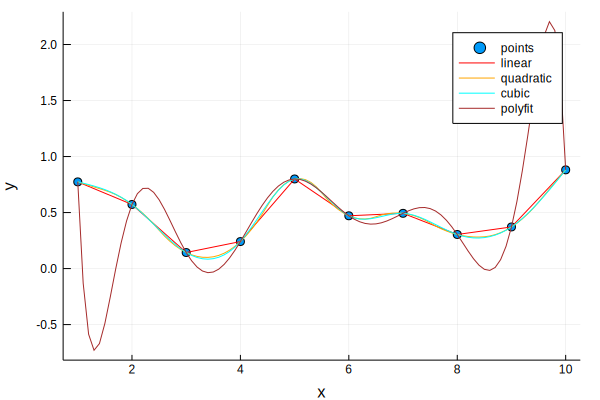

In [28]:
# zadanie nr 5 - spline'y

import Pkg;
Pkg.add("Interpolations")
using Plots, Interpolations

xs =  1:1:10
ys = [rand() for x in xs]

xs2 = 1:0.1:10

linear = LinearInterpolation(xs, ys)
linear_ys = [linear(x) for x in xs2]

quadratic = interpolate(ys, BSpline(Quadratic(Line(OnCell()))))
quadratic_ys = [quadratic(x) for x in xs2]

cubic = CubicSplineInterpolation(xs, ys)
cubic_ys = [cubic(x) for x in xs2]

fit = polyfit(xs, ys, length(xs) - 1)
polyfit_ys = polyval(fit, xs2)


scatter(xs, ys, label = "points")
plot!(xs2, linear_ys, label = "linear", color = "red")
plot!(xs2, quadratic_ys, label = "quadratic", color = "orange")
plot!(xs2, cubic_ys, label = "cubic", color = "cyan")
plot!(xs2, polyfit_ys, label = "polyfit", color = "brown")
xlabel!("x")
ylabel!("y")

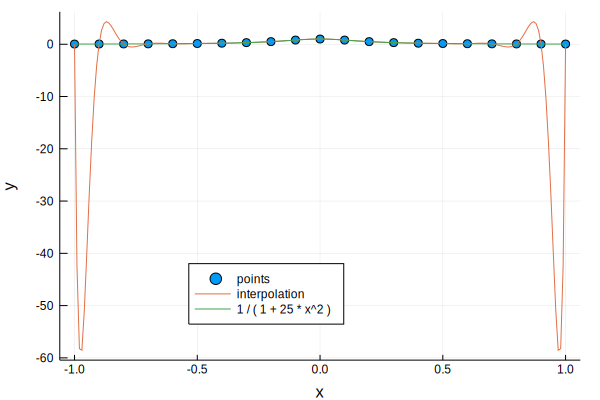

In [29]:
# zadanie nr 6 - Efekt Rungego

# funkcja, która obrazuje efekt Rungego: 1 / (1 + 25x^2)

###############################################################

function lagrange_interpolation(x_s, y_s, x)
    val = 0
    for i in 1:1:length(x_s)
        tmp = y_s[i]
        for j in 1:1:length(x_s)
            if i != j
                tmp *= (x - x_s[j]) / (x_s[i] - x_s[j])
            end
        end
        val += tmp
    end
    return val
end

###############################################################

xs = -1:0.1:1
ys = [1 / (1 + 25 * x^2) for x in xs]

xs2 = -1:0.01:1
lagrange_ys = [lagrange_interpolation(xs, ys, x) for x in xs2]
actual_ys = [1 / (1 + 25 * x^2) for x in xs2]

###############################################################

scatter(xs, ys, label = "points", legend=:bottom)
plot!(xs2, lagrange_ys, label = "interpolation")
plot!(xs2, actual_ys, label="1 / ( 1 + 25 * x^2 )")
xlabel!("x")
ylabel!("y")

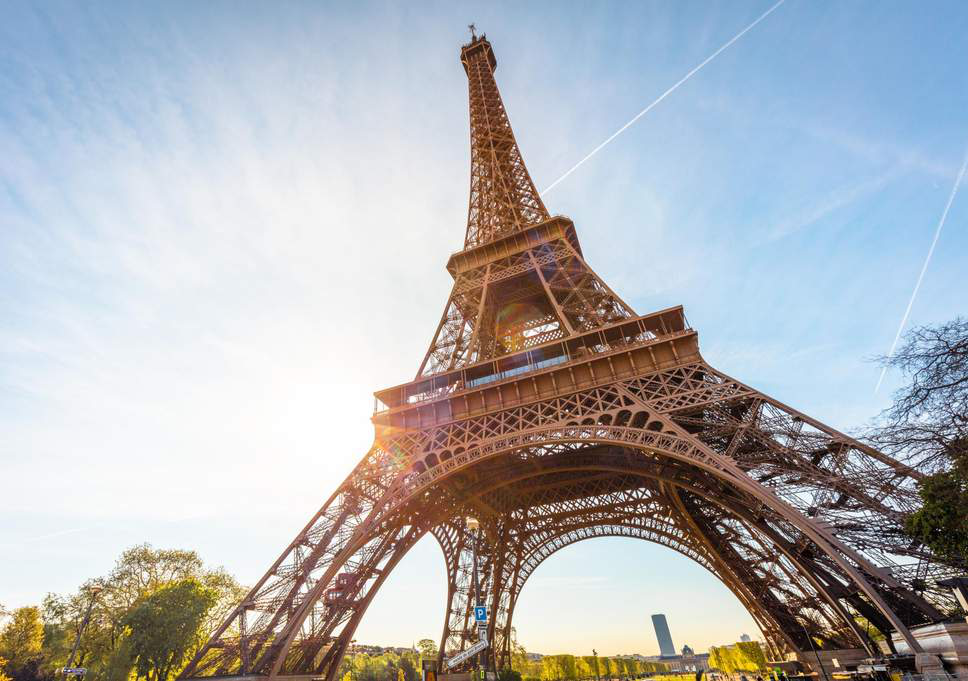

In [47]:
# zadanie nr 7 - interpolacja w grafice komputerowej

using Images

image = Images.load("eiffel-tower.jpg")

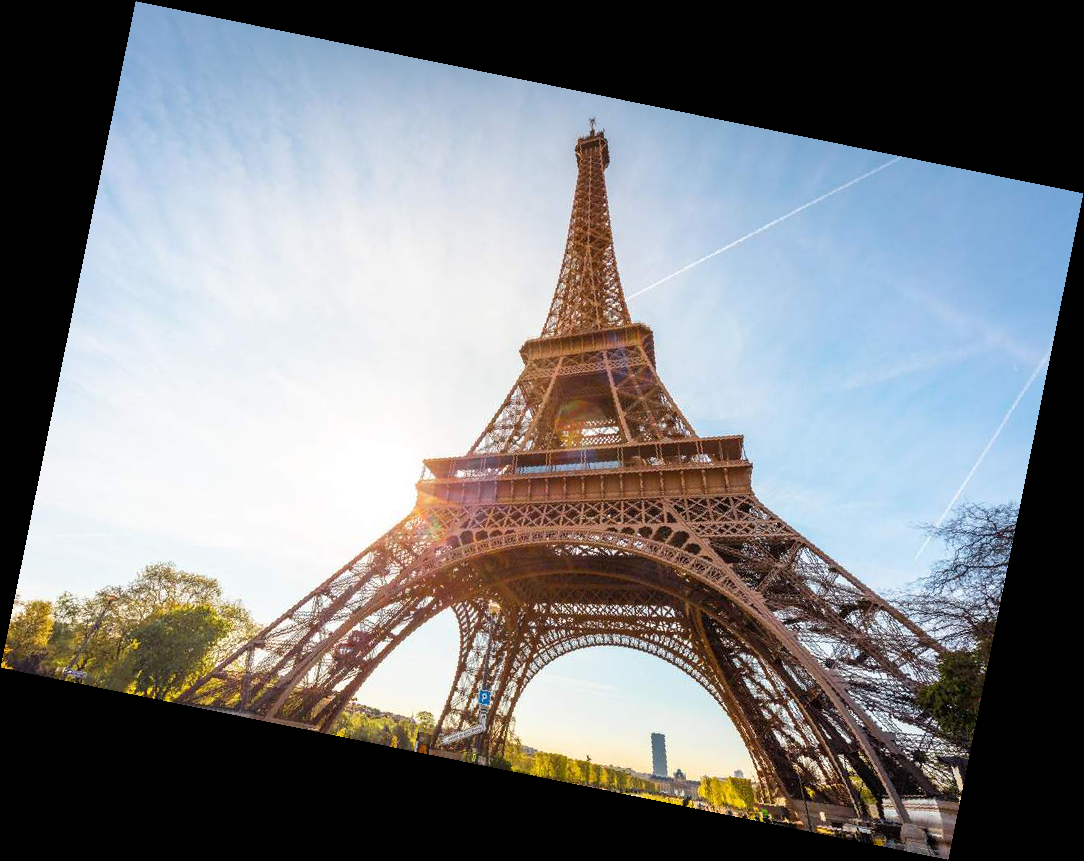

In [48]:
imrotate(image, 0.2, Constant())

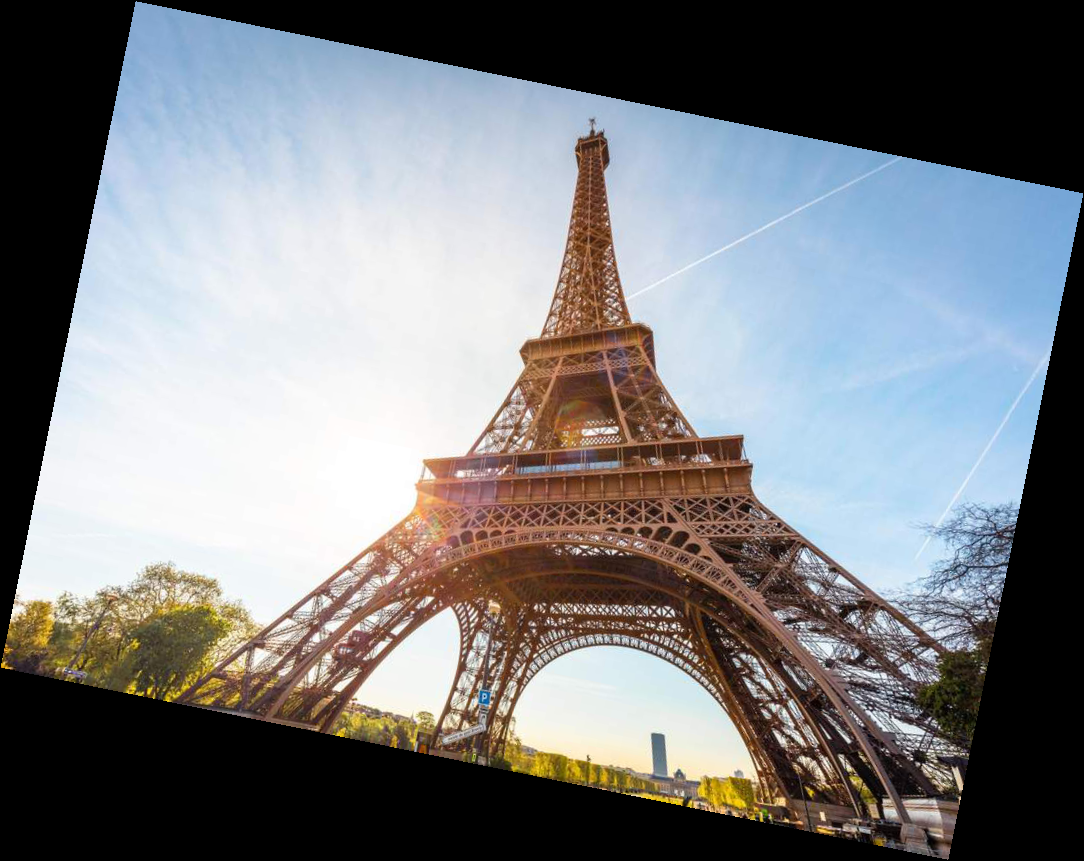

In [49]:
imrotate(image, 0.2, Linear())